In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data= pd.read_csv(r"C:\Users\apurv\Data Science\Deep Learning\Churn_Modelling.csv")

In [3]:
df= data.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

In [7]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Geography']= le.fit_transform(df['Geography'])
df['Gender']= le.fit_transform(df['Gender'])

In [10]:
x= df.drop('Exited', axis= 1)
y= df['Exited']

In [11]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 101)
x_train.shape, x_test.shape

((8000, 10), (2000, 10))

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train= ss.fit_transform(x_train)
x_test= ss.transform(x_test)

<h3> Creating a ANN (Artificial Neural Network) </h3>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

1. Sequential -> huge block that has a neural network inside this and that can be done by sequential.
2. Dense -> In hidden layer, we can create neurons.
3. ReLU -> Activation Functions
4. Dropout -> Used to avoid overfitting condition by deactivating neurons.

In [18]:
#ANN initialization
classifier= Sequential()

In [19]:
#Adding the input layer
classifier.add(Dense(units= 11, activation= 'relu')) #Since here are 11 features, we need to create 11 nodes in input layer

In [20]:
#Adding the first hidden layer
classifier.add(Dense(units= 7, activation= 'relu'))  #In fist hidden layer 7 neurons will get added
classifier.add(Dropout(0.2))  #To add dropout

In [21]:
#Adding the second hidden layer
classifier.add(Dense(units= 6, activation= 'relu'))  #In second hidden layer 6 neurons will get added

In [22]:
#Adding the output layer
classifier.add(Dense(1, activation= 'sigmoid'))

In [23]:
#Training the neural network
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [24]:
#import tensorflow
#opt= tensorflow.keras.optimizers.Adam(learning_rate= 0.02) 
#classifier.compile(optimizer= opt, loss= 'binary_crossentropy', metrics= ['accuracy'])
#By default, learning rate is 0.01, we can change by doing this.

In [25]:
#Early stopping
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [26]:
model_history= classifier.fit(x_train, y_train, validation_split= 0.33, batch_size= 10, epochs= 1000, callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7763 - loss: 0.5360 - val_accuracy: 0.7982 - val_loss: 0.4511
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4543 - val_accuracy: 0.7982 - val_loss: 0.4361
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7952 - loss: 0.4418 - val_accuracy: 0.7986 - val_loss: 0.4244
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7992 - loss: 0.4299 - val_accuracy: 0.8039 - val_loss: 0.4165
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8060 - loss: 0.4244 - val_accuracy: 0.8175 - val_loss: 0.4051
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4099 - val_accuracy: 0.8304 - val_loss: 0.3945
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.4091 - val_accuracy: 0.8417 - val_loss: 0.3824
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8535 - loss: 0.3805 - 

In [27]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

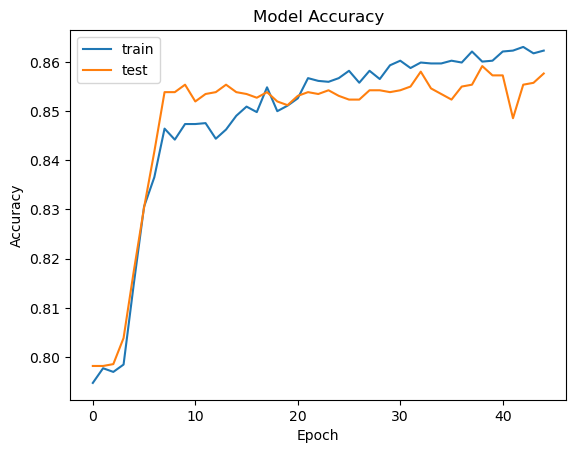

In [28]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

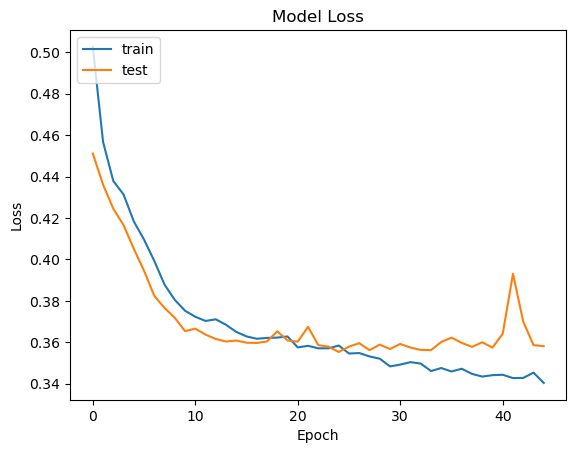

In [29]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [30]:
#Making prediction and evaluation of the model
y_pred= classifier.predict(x_test)
y_pred= (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


1. If y_pred (the predicted probability) is greater than or equal to 0.5, it's considered as a positive prediction (1).
2. If y_pred is less than 0.5, it's considered as a negative prediction (0).

In [31]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1527,   50],
       [ 212,  211]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
score

0.869

In [33]:
#To see the weights assigned
classifier.get_weights()

[array([[-0.11131277,  0.2193061 , -0.08834384, -0.04933323, -0.02749154,
          0.10580572, -0.03224274,  0.08631659,  0.00498388,  0.0933573 ,
         -0.14405072],
        [ 0.0270662 ,  0.5001635 , -0.01227587,  0.33017275, -0.3089499 ,
         -0.9950787 ,  0.15335335,  0.08288372,  0.13570395,  0.43421954,
          0.68019307],
        [ 0.44789585,  0.48613647,  0.03319573,  0.71996844, -0.11556948,
          0.09238494, -0.03710423, -0.00538415,  0.01402385, -0.01505178,
         -0.12229538],
        [ 0.5977082 , -0.12656036,  0.64362085, -0.38424557, -0.00114131,
         -0.69829756,  0.2892111 , -0.17713697,  0.6906685 ,  0.35304993,
         -0.32900143],
        [ 0.2644337 ,  0.07421298,  0.02634746, -0.1272889 ,  0.0125209 ,
         -0.01282808,  0.00360477,  0.10646822, -0.03781938, -0.01558036,
          0.07421546],
        [-0.0827693 ,  0.23221655, -0.30367163, -0.19938113, -0.40793303,
         -0.11178933,  0.1003653 , -0.71346456, -0.15034924, -0.0357335